In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Part-I
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
X = df[['Age', 'EstimatedSalary']]
Y = df['Purchased']

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)
print(X_train[:3])
print('--'*15)
print(Y_train[:3])
print('--'*15)
print(X_test[:3])
print('--'*15)
print(Y_test[:3])

     Age  EstimatedSalary
92    26            15000
223   60           102000
234   38           112000
------------------------------
92     0
223    1
234    0
Name: Purchased, dtype: int64
------------------------------
     Age  EstimatedSalary
132   30            87000
309   38            50000
341   35            75000
------------------------------
132    0
309    0
341    0
Name: Purchased, dtype: int64


In [5]:
standard = StandardScaler()
X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)
print(X_train[:3])
print('--'*15)
print(X_test[:3])

[[-1.1631724  -1.5849703 ]
 [ 2.17018137  0.93098672]
 [ 0.0133054   1.22017719]]
------------------------------
[[-0.77101313  0.49720103]
 [ 0.0133054  -0.57280368]
 [-0.28081405  0.15017248]]


In [6]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
prediction = classifier.predict(X_test)

In [7]:
print(prediction[:10])
print(prediction[:30])
print(prediction[:20])

[0 0 0 0 0 0 0 1 0 1]
[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0]
[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0]


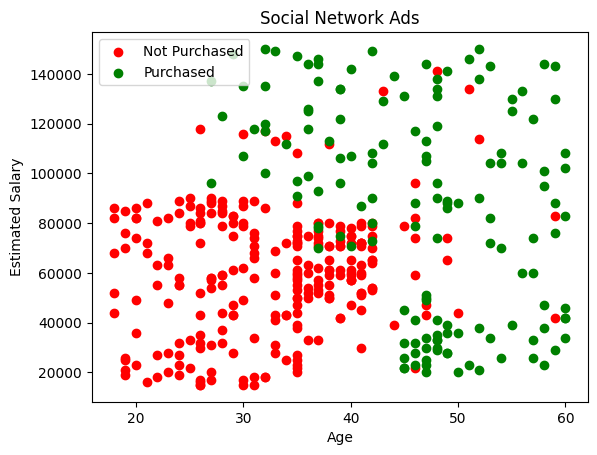

In [8]:
plt.scatter(df[df['Purchased'] == 0]['Age'], df[df['Purchased'] == 0]['EstimatedSalary'], color='red')
plt.scatter(df[df['Purchased'] == 1]['Age'], df[df['Purchased'] == 1]['EstimatedSalary'], color='green')
plt.title('Social Network Ads')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(['Not Purchased', 'Purchased'])
plt.show()

In [9]:
# Part-II
cm = confusion_matrix(Y_test, prediction)
print('Correct Prediction:')
print(cm)

Correct Prediction:
[[74  5]
 [11 30]]


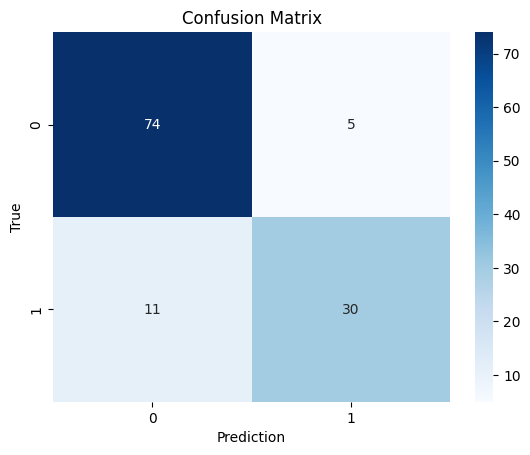

In [10]:
sns.heatmap(cm, cmap="Blues", annot=True, fmt="d")
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [11]:
truePositive, falsePositive, falseNegative, trueNegative = cm.ravel()

accuracy = (truePositive + trueNegative)/(truePositive +falsePositive + falseNegative + trueNegative)
errorRate = (falsePositive + falseNegative)/(truePositive + falsePositive + falseNegative + trueNegative)
precision = truePositive/(truePositive + falsePositive)
recall = truePositive/(truePositive + falseNegative)
print('Accuracy : ', accuracy)
print("Error Rate:", errorRate)
print("Precision:", precision)
print("Recall:", recall)

Accuracy :  0.8666666666666667
Error Rate: 0.13333333333333333
Precision: 0.9367088607594937
Recall: 0.8705882352941177
